# 1. 선형 회귀 실습(1) - 팀

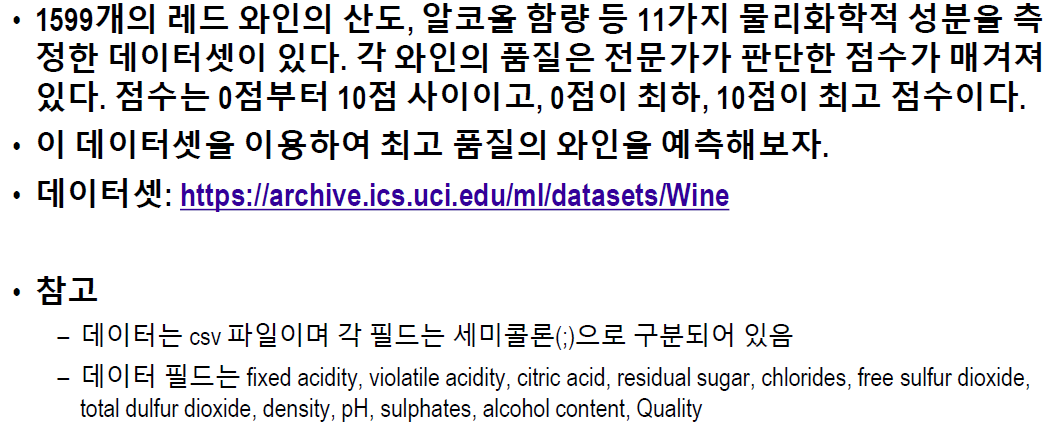

데이터셋: https://archive.ics.uci.edu/ml/datasets/Wine

In [2]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [3]:
import pandas as pd
import numpy as np

### 데이터 불러오기

In [11]:
data = pd.read_csv('./winequality-red.csv', sep = ';')

In [82]:
y_data = data['quality']

In [83]:
x_data = data.drop('quality', axis=1)

### train, test 나누기

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

### RMSLE 함수

In [63]:
#from sklearn.metrics import mean_squared_error, mean_absolute_error
#import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

## Linear regression

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_predictions = regressor.predict(x_test)
print('R-squared: %s' % regressor.score(x_test, y_test))

R-squared: 0.41053850089149135


In [46]:
from sklearn.model_selection import cross_val_score
#교차 성능 평가
scores = cross_val_score(regressor, x_data, y_data, cv = 5)
print(scores.mean())
print(scores)

0.2900416288421957
[0.13200871 0.31858135 0.34955348 0.369145   0.2809196 ]


## Ridge

In [87]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model= Ridge()

##하이퍼파라미터값목록
ridge_params= {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

##교차검증용평가함수(RMSLE 점수계산)
rmsle_scorer= metrics.make_scorer(rmsle, greater_is_better=False)

##그리드서치(with 릿지) 객체생성
gridsearch_ridge_model= GridSearchCV(estimator=ridge_model, # 릿지모델
                                     param_grid=ridge_params, # 값목록
                                     scoring=rmsle, # 평가지표
                                     cv=5) # 교차검증분할수

In [88]:
log_y= np.log(y_data) # 타깃값로그변환
gridsearch_ridge_model.fit(x_data, log_y) # 훈련(그리드서치)
print('최적하이퍼파라미터:', gridsearch_ridge_model.best_params_)
# 예측
preds= gridsearch_ridge_model.best_estimator_.predict(x_data)
# 평가
print(f'릿지회귀RMSLE 값: {rmsle(log_y, preds, True):.4f}')

C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\silvi\AppData\Local\Temp\ipykernel_5860\2567825695.py", line 6, in rmsle
    if convertExp:
  File "C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\pandas\core\generic.py", line 1535, in __nonzero__
    raise ValueError(
ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

  warnings.warn(
C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. De

C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\silvi\AppData\Local\Temp\ipykernel_5860\2567825695.py", line 6, in rmsle
    if convertExp:
  File "C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\pandas\core\generic.py", line 1535, in __nonzero__
    raise ValueError(
ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

  warnings.warn(
C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. De

C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\silvi\AppData\Local\Temp\ipykernel_5860\2567825695.py", line 6, in rmsle
    if convertExp:
  File "C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\pandas\core\generic.py", line 1535, in __nonzero__
    raise ValueError(
ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

  warnings.warn(
C:\Users\silvi\Anaconda3\envs\basic\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. De

최적하이퍼파라미터: {'alpha': 0.1, 'max_iter': 3000}
릿지회귀RMSLE 값: 0.0993


## Lasso

In [89]:
from sklearn.linear_model import Lasso

In [90]:
# 모델생성
lasso_model= Lasso()

# 하이퍼파라미터값목록
lasso_alpha= 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params= {'max_iter':[3000], 'alpha':lasso_alpha}

# 그리드서치(with 라쏘) 객체생성
gridsearch_lasso_model= GridSearchCV(estimator=lasso_model,
                                     param_grid=lasso_params,
                                     scoring=rmsle_scorer,
                                     cv=5)

In [91]:
# 그리드서치수행
log_y= np.log(y_data) # 타깃값로그변환



gridsearch_lasso_model.fit(x_data, log_y)
print('최적하이퍼파라미터:', gridsearch_lasso_model.best_params_)

# 예측
preds= gridsearch_lasso_model.best_estimator_.predict(x_data)

# 평가
print(f'라쏘회귀RMSLE 값: {rmsle(log_y, preds, True):.4f}')

최적하이퍼파라미터: {'alpha': 0.00125, 'max_iter': 3000}
라쏘회귀RMSLE 값: 0.1006
